<center>
    <img src="https://i.ibb.co.com/m5hwhf2/HDC-Anca.png" width="300">
    <h1><b>Airline Customer Value Analysis - by Heptad Data Collector</b></h1>
</center>

**Members of Heptad Data Collector**

1. Farah Fitria Sari
2. Aditya Fajri Melinianto
3. Apri Ansyah
5. Oktafina Pingkan Purwanto
6. Pancaran Ratna Mustika
7. Ryan Fajar
8. Tiara Lailatul Nikmah

- **Tools**

![Made withJupyter](https://img.shields.io/badge/Made%20with-Jupyter-orange?style=for-the-badge&logo=Jupyter)
![Featuring](https://img.shields.io/badge/Using-Python-blue?style=for-the-badge&logo=python)

- **Dataset**

Using private dataset from Rakamin Academy

- **Find us on GitHub**

Our Repository: [Airline Customer Value Analysis](https://github.com/heptaddc/Airline-Customer-Value-Analysis-Case "Airline Customer Value Analysis")

# Airline Customer Value Clustering

## Definisi masing-masing kolom

<center>
    <img src="https://www.discover-airlines.com/imgproxy/default-md/www.discover-airlines.com/en/assets/fleet/A320-200_Motiv_02_2400x1600px_cut.jpg" width="600">
</center>

<br>

| No | Nama Kolom | Definisi |
| :- | -: | :-: |
| 1 | MEMBER_NO-b | ID Member
| 2 | FFP_DATE | FFP_DATE
| 3 | FIRST_FLIGHT_DATE | Tanggal Penerbangan pertama
| 4 | GENDER | Jenis Kelamin
| 5 | FFP_TIER | Tier dari Frequent Flyer Program
| 6 | WORK_CITY | Kota Asal
| 7 | WORK_PROVINCE | Provinsi Asal
| 8 | WORK_COUNTRY | Negara Asal
| 9 | AGE | Umur Customer
| 10 | LOAD_TIME | Tanggal data diambil
| 11 | FLIGHT_COUNT | Jumlah penerbangan Customer
| 12 | BP_SUM |  Rencana Perjalanan
| 13 | SUM_YR_1 | Fare Revenue
| 14 | SUM_YR_2 | Votes Prices
| 15 | SEG_KM_SUM | Total jarak(km) penerbangan yg sudah dilakukan
| 16 | LAST_FLIGHT_DATE | Tanggal penerbangan terakhir
| 17 | LAST_TO_END | Jarak waktu penerbangan terakhir ke pesanan penerbangan paling akhir
| 18 | AVG_INTERVAL | Rata-rata jarak waktu
| 19 | MAX_INTERVAL | Maksimal jarak waktu
| 20 | EXCHANGE_COUNT | Jumlah penukaran
| 21 | avg_discount | Rata rata discount yang didapat customer
| 22 | Points_Sum |  Jumlah poin yang didapat customer
| 23 | Point_NotFlight |  point yang tidak digunakan oleh members

## Goals

Melakukan clustering dengan menggunakan dataset yang sudah disediakan dan menginterpretasi hasil dari clustering tersebut untuk menghasilkan rekomendasi bisnis


## Main Instruction
- EDA
- Feature Engineering
- Modeling + Evaluasi
- Interpretasi model + Rekomendasi


# **Library**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.stats.proportion as sp
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# **Import Data**

In [ ]:
data = pd.read_csv('flight.csv')
data

MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE  GENDER  FFP_TIER    WORK_CITY  \
0          54993  11/2/2006        12/24/2008    Male         6            .   
1          28065  2/19/2007          8/3/2007    Male         6          NaN   
2          55106   2/1/2007         8/30/2007    Male         6            .   
3          21189  8/22/2008         8/23/2008    Male         5  Los Angeles   
4          39546  4/10/2009         4/15/2009    Male         6      guiyang   
...          ...        ...               ...     ...       ...          ...   
62983      18375  5/20/2011          6/5/2013  Female         4    guangzhou   
62984      36041   3/8/2010         9/14/2013    Male         4       foshan   
62985      45690  3/30/2006         12/2/2006  Female         4    guangzhou   
62986      61027   2/6/2013         2/14/2013  Female         4    guangzhou   
62987      61340  2/17/2013         2/17/2013  Female         4     shanghai   

      WORK_PROVINCE WORK_COUNTRY   AGE  LOAD_TIME  ...  SUM_YR_2  SEG_KM_SUM  \
0           beijing           CN  31.0  3/31/2014  ...  234188.0      580717   
1           beijing           CN  42.0  3/31/2014  ...  167434.0      293678   
2           beijing           CN  40.0  3/31/2014  ...  164982.0      283712   
3                CA           US  64.0  3/31/2014  ...  125500.0      281336   
4           guizhou           CN  48.0  3/31/2014  ...  130702.0      309928   
...             ...          ...   ...        ...  ...       ...         ...   
62983     guangdong           CN  25.0  3/31/2014  ...       0.0        1134   
62984     guangdong           CN  38.0  3/31/2014  ...       0.0        8016   
62985     guangdong           CN  43.0  3/31/2014  ...       0.0        2594   
62986     guangdong           CN  36.0  3/31/2014  ...       0.0        3934   
62987             .           CN  29.0  3/31/2014  ...       0.0        4222   

       LAST_FLIGHT_DATE  LAST_TO_END  AVG_INTERVAL MAX_INTERVAL  \
0             3/31/2014            1      3.483254           18   
1             3/25/2014            7      5.194245           17   
2             3/21/2014           11      5.298507           18   
3            12/26/2013           97     27.863636           73   
4             3/27/2014            5      4.788079           47   
...                 ...          ...           ...          ...   
62983          6/9/2013          297      4.000000            4   
62984          1/3/2014           89     37.000000           60   
62985          3/3/2014           29    166.000000          166   
62986         2/26/2013          400     12.000000           12   
62987         2/23/2013          403      6.000000            6   

       EXCHANGE_COUNT  avg_discount  Points_Sum  Point_NotFlight  
0                  34      0.961639      619760               50  
1                  29      1.252314      415768               33  
2                  20      1.254676      406361               26  
3                  11      1.090870      372204               12  
4                  27      0.970658      338813               39  
...               ...           ...         ...              ...  
62983               1      0.000000       12318               22  
62984              14      0.000000      106972               43  
62985               0      0.000000           0                0  
62986               0      0.000000           0                0  
62987               0      0.000000           0                0  

[62988 rows x 23 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

# **1. Data Cleansing - 1st Section**

## **A. Handle Missing Values**

In [ ]:
# cek missing value
data.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

In [ ]:
# menghapus baris yang mengandung missing value
data.dropna(subset=['GENDER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'AGE', 'SUM_YR_1', 'SUM_YR_2'], inplace=True)

In [ ]:
# cek apakah semua missing value sudah terhapus
data.isna().sum()

MEMBER_NO            0
FFP_DATE             0
FIRST_FLIGHT_DATE    0
GENDER               0
FFP_TIER             0
WORK_CITY            0
WORK_PROVINCE        0
WORK_COUNTRY         0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

## **B. Handle Duplicate Data**

In [ ]:
# cek duplikasi data pada semua kolom
data.duplicated().value_counts()

False    58255
Name: count, dtype: int64

Tidak ada duplikasi data, sehingga tidak perlu dilakukan langkah handle duplikasi data

## **C. Feature Transformation**

### 1. Pada kolom LAST_FLIGHT_DATE ada kesalahan input 2014/2/29  0:00:00 pada 395 entri akan dihapus


Tidak ada tanggal 29 februari 2014 karena tahun 2014 bukan tahun kabisat, tanggal 29 Februari tidak valid. dan akan menyebabkan error ketika dirubah ke tipe datetime64

In [ ]:
# melihat jumlah baris yang memiliki kesalahan input '2014/2/29  0:00:00'
filtered_lfd = data[data['LAST_FLIGHT_DATE'] == '2014/2/29  0:00:00']
filtered_lfd

MEMBER_NO    FFP_DATE FIRST_FLIGHT_DATE  GENDER  FFP_TIER  WORK_CITY  \
248        56497   6/17/2007         6/17/2007  Female         6  guangzhou   
447        17306   8/26/2009         4/29/2010    Male         5    haerbin   
473          915  11/10/2006         1/26/2007    Male         5          .   
832        20336   7/13/2005          8/6/2005    Male         5  guangzhou   
1051       62884   5/24/2006         4/21/2007    Male         5      wuhan   
...          ...         ...               ...     ...       ...        ...   
61388       4076    4/8/2009         4/11/2009    Male         4   wulumuqi   
61539      55995   1/11/2013         7/10/2013    Male         4  dalianshi   
61871      48742   7/26/2009         7/26/2009    Male         4    tianjin   
61909       9190   4/11/2011         4/20/2011    Male         4  guangzhou   
62721      38776  10/31/2007         3/13/2008    Male         4     foshan   

      WORK_PROVINCE WORK_COUNTRY   AGE  LOAD_TIME  ...  SUM_YR_2  SEG_KM_SUM  \
248       guangdong           CN  46.0  3/31/2014  ...   70845.0       85000   
447    heilongjiang           CN  70.0  3/31/2014  ...   46323.0       69453   
473         beijing           CN  39.0  3/31/2014  ...   30580.0       65717   
832       guangdong           CN  40.0  3/31/2014  ...   36417.0      114222   
1051          hubei           CN  50.0  3/31/2014  ...   35680.0       49859   
...             ...          ...   ...        ...  ...       ...         ...   
61388      xinjiang           CN  45.0  3/31/2014  ...     783.0        3243   
61539      liaoning           CN  23.0  3/31/2014  ...     955.0        3513   
61871       tianjin           CN  37.0  3/31/2014  ...     966.0        1298   
61909     guangdong           CN  34.0  3/31/2014  ...     853.0        2595   
62721     guangdong           CN  42.0  3/31/2014  ...     688.0        1199   

         LAST_FLIGHT_DATE  LAST_TO_END  AVG_INTERVAL MAX_INTERVAL  \
248    2014/2/29  0:00:00           32     13.250000           57   
447    2014/2/29  0:00:00           32     22.766667           75   
473    2014/2/29  0:00:00           32     14.250000           65   
832    2014/2/29  0:00:00           32      8.696203           34   
1051   2014/2/29  0:00:00           32     19.115385           72   
...                   ...          ...           ...          ...   
61388  2014/2/29  0:00:00           32    459.000000          459   
61539  2014/2/29  0:00:00           32    117.000000          211   
61871  2014/2/29  0:00:00           32    135.000000          135   
61909  2014/2/29  0:00:00           32      1.000000            1   
62721  2014/2/29  0:00:00           32     78.000000           78   

       EXCHANGE_COUNT  avg_discount  Points_Sum  Point_NotFlight  
248                 0      1.373478      132653                4  
447                 6      1.375395      101413                7  
473                 1      1.425974       93153                8  
832                 2      0.664970       91476               15  
1051                4      1.388584       69047                4  
...               ...           ...         ...              ...  
61388               1      0.308511        2180                2  
61539               0      0.276667           0                0  
61871               0      0.690000        1094                1  
61909               0      0.340000        3356               19  
62721               0      0.489525         276                0  

[395 rows x 23 columns]

In [ ]:
# Mengidentifikasi indeks baris yang mengandung nilai '2014/2/29  0:00:00' di kolom 'LAST_FLIGHT_DATE'
index_to_drop = data[data['LAST_FLIGHT_DATE'] == '2014/2/29  0:00:00'].index

# Menghapus baris berdasarkan indeks
data.drop(index_to_drop, inplace=True)

In [ ]:
# melihat apakah masih ada kesalahan input
filtered_lfd = data[data['LAST_FLIGHT_DATE'] == '2014/2/29  0:00:00']
filtered_lfd

Empty DataFrame
Columns: [MEMBER_NO, FFP_DATE, FIRST_FLIGHT_DATE, GENDER, FFP_TIER, WORK_CITY, WORK_PROVINCE, WORK_COUNTRY, AGE, LOAD_TIME, FLIGHT_COUNT, BP_SUM, SUM_YR_1, SUM_YR_2, SEG_KM_SUM, LAST_FLIGHT_DATE, LAST_TO_END, AVG_INTERVAL, MAX_INTERVAL, EXCHANGE_COUNT, avg_discount, Points_Sum, Point_NotFlight]
Index: []

[0 rows x 23 columns]

### 2. Kolom FFP_DATE, FIRST_FLIGHT_DATE, LOAD_TIME, LAST_FLIGHT_DATE diganti ke datetime64

In [ ]:
#Kita akan merubah tipe kolom yang memiliki tanggal menjadi tipe date/tanggal
date_col = ['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE']
data[date_col] = pd.to_datetime(data[date_col].stack()).unstack()

In [ ]:
# mengecek tipe data datetime
data[['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 57860 entries, 0 to 62986
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FFP_DATE           57860 non-null  datetime64[ns]
 1   FIRST_FLIGHT_DATE  57860 non-null  datetime64[ns]
 2   LOAD_TIME          57860 non-null  datetime64[ns]
 3   LAST_FLIGHT_DATE   57860 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 4.2 MB


### 3. Pada kolom FIRST_FLIGHT_DATE ada kesalahan input tahun 1905 pada 2 entri akan dihapus


In [ ]:
# melihat jumlah baris yang memiliki value '1905-12-31'
filtered_ffd = data[data['FIRST_FLIGHT_DATE'] == '1905-12-31']
filtered_ffd

MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE  GENDER  FFP_TIER     WORK_CITY  \
4455       41193 2011-02-27        1905-12-31    Male         4        dalian   
30099       1999 2004-11-10        1905-12-31  Female         4  guangzhoushi   

        WORK_PROVINCE WORK_COUNTRY   AGE  LOAD_TIME  ...  SUM_YR_2  \
4455         liaoning           CN  35.0 2014-03-31  ...   22244.0   
30099  guangdongsheng           CN  37.0 2014-03-31  ...    1907.0   

       SEG_KM_SUM  LAST_FLIGHT_DATE  LAST_TO_END  AVG_INTERVAL MAX_INTERVAL  \
4455        52763        2014-03-14           18     18.051282           92   
30099        9592        2013-11-19          134     75.000000          178   

       EXCHANGE_COUNT  avg_discount  Points_Sum  Point_NotFlight  
4455                1      0.688062       33588               27  
30099               1      0.775909       26192               38  

[2 rows x 23 columns]

In [ ]:
# Mengidentifikasi indeks baris yang mengandung nilai ''1905-12-31' di kolom 'FIRST_FLIGHT_DATE'
index_to_drop = data[data['FIRST_FLIGHT_DATE'] == '1905-12-31'].index

# Menghapus baris berdasarkan indeks
data.drop(index_to_drop, inplace=True)

In [ ]:
# melihat apakaj masih ada kesalahan input
filtered_ffd = data[data['FIRST_FLIGHT_DATE'] == '1905-12-31']
filtered_ffd

Empty DataFrame
Columns: [MEMBER_NO, FFP_DATE, FIRST_FLIGHT_DATE, GENDER, FFP_TIER, WORK_CITY, WORK_PROVINCE, WORK_COUNTRY, AGE, LOAD_TIME, FLIGHT_COUNT, BP_SUM, SUM_YR_1, SUM_YR_2, SEG_KM_SUM, LAST_FLIGHT_DATE, LAST_TO_END, AVG_INTERVAL, MAX_INTERVAL, EXCHANGE_COUNT, avg_discount, Points_Sum, Point_NotFlight]
Index: []

[0 rows x 23 columns]

### 4. Kolom AGE diganti menjadi int64

In [ ]:
# merubah tipe data menjadi int64
data['AGE']= data['AGE'].astype(int)

In [ ]:
# mengecek tipe data AGE
data['AGE'].dtypes

dtype('int64')

### 5. Kolom Age dibagi menjadi 3 kategori: Di bawah usia produktif (15-64), Usia produktif, di atas usia produktif

In [ ]:
# mengkategorikan kolom AGE menjadi 3 kategori
bins = [0, 14, 64, float('inf')]
labels = ['Bawah Usia Produktif', 'Usia Produktif', 'Atas Usia Produktif']
data['AGE'] = pd.cut(data['AGE'], bins=bins, labels=labels, right=False)

In [ ]:
data['AGE']

0             Usia Produktif
2             Usia Produktif
3        Atas Usia Produktif
4             Usia Produktif
5        Atas Usia Produktif
                ...         
62982         Usia Produktif
62983         Usia Produktif
62984         Usia Produktif
62985         Usia Produktif
62986         Usia Produktif
Name: AGE, Length: 57858, dtype: category
Categories (3, object): ['Bawah Usia Produktif' < 'Usia Produktif' < 'Atas Usia Produktif']

### 6. AVG_DISCOUNT -> di atas 1 dihapus

In [ ]:
# cek jumlah baris yang memiliki avg_discount >=1
filtered_ad = data[data['avg_discount'] >= 1]
filtered_ad

MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE  GENDER  FFP_TIER  \
2          55106 2007-02-01        2007-08-30    Male         6   
3          21189 2008-08-22        2008-08-23    Male         5   
13         54943 2006-10-25        2007-10-27    Male         6   
15          1254 2008-03-28        2008-04-05    Male         4   
16          8253 2010-07-15        2010-08-20    Male         6   
...          ...        ...               ...     ...       ...   
62584      15492 2012-04-18        2013-02-16  Female         4   
62775       7300 2013-02-01        2013-02-01    Male         4   
62776      21318 2008-05-04        2008-05-19    Male         4   
62925       5079 2011-04-24        2011-04-24    Male         4   
62927      33032 2011-11-29        2012-06-11    Male         4   

             WORK_CITY   WORK_PROVINCE WORK_COUNTRY                  AGE  \
2                    .         beijing           CN       Usia Produktif   
3          Los Angeles              CA           US  Atas Usia Produktif   
13            shenzhen       guangdong           CN       Usia Produktif   
15     BOWLAND HEIGHTS      CALIFORNIA           US       Usia Produktif   
16            wulumuqi        xinjiang           CN       Usia Produktif   
...                ...             ...          ...                  ...   
62584     guangzhoushi  guangdongsheng           CN  Atas Usia Produktif   
62775           foshan       guangdong           CN       Usia Produktif   
62776              ABA            ABIA           NG       Usia Produktif   
62925      BELLREGUARD        VALENCIA           ES       Usia Produktif   
62927         Danville               －           CN       Usia Produktif   

       LOAD_TIME  ...  SUM_YR_2  SEG_KM_SUM  LAST_FLIGHT_DATE  LAST_TO_END  \
2     2014-03-31  ...  164982.0      283712        2014-03-21           11   
3     2014-03-31  ...  125500.0      281336        2013-12-26           97   
13    2014-03-31  ...  119832.0      179514        2014-03-29            3   
15    2014-03-31  ...   54764.0      234721        2014-01-27           65   
16    2014-03-31  ...   93114.0      172231        2014-03-25            7   
...          ...  ...       ...         ...               ...          ...   
62584 2014-03-31  ...       0.0         660        2013-02-20          406   
62775 2014-03-31  ...     760.0         552        2013-04-03          364   
62776 2014-03-31  ...       0.0         552        2012-08-31          579   
62925 2014-03-31  ...    1410.0         368        2013-04-29          338   
62927 2014-03-31  ...       0.0         368        2012-06-16          655   

       AVG_INTERVAL MAX_INTERVAL  EXCHANGE_COUNT  avg_discount  Points_Sum  \
2          5.298507           18              20      1.254676      406361   
3         27.863636           73              11      1.090870      372204   
13         6.196581           38              14      1.398382      270704   
15        31.190476          102               6      1.026085      310002   
16         6.840000           41              15      1.386525      257193   
...             ...          ...             ...           ...         ...   
62584      4.000000            4               0      1.000000        1000   
62775     30.500000           31               0      1.000000        1500   
62776     59.500000          113               0      1.000000        1500   
62925      5.000000            5               0      1.000000        1000   
62927      5.000000            5               0      1.000000        1000   

       Point_NotFlight  
2                   26  
3                   12  
13                  20  
15                   8  
16                  22  
...                ...  
62584                0  
62775                0  
62776                0  
62925                0  
62927                0  

[3257 rows x 23 columns]

In [ ]:
# Mengidentifikasi indeks baris yang mengandung nilai >= 1 di kolom 'avg_discount'
index_to_drop = data[data['avg_discount'] >= 1].index

# Menghapus baris berdasarkan indeks
data.drop(index_to_drop, inplace=True)

In [ ]:
# melihat kembali apakah masih ada nilai avg_discount >= 1
filtered_ad = data[data['avg_discount'] >= 1]
filtered_ad

Empty DataFrame
Columns: [MEMBER_NO, FFP_DATE, FIRST_FLIGHT_DATE, GENDER, FFP_TIER, WORK_CITY, WORK_PROVINCE, WORK_COUNTRY, AGE, LOAD_TIME, FLIGHT_COUNT, BP_SUM, SUM_YR_1, SUM_YR_2, SEG_KM_SUM, LAST_FLIGHT_DATE, LAST_TO_END, AVG_INTERVAL, MAX_INTERVAL, EXCHANGE_COUNT, avg_discount, Points_Sum, Point_NotFlight]
Index: []

[0 rows x 23 columns]

# **2. Feature Engineering**

## **A. Feature Extraction**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54601 entries, 0 to 62986
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          54601 non-null  int64         
 1   FFP_DATE           54601 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE  54601 non-null  datetime64[ns]
 3   GENDER             54601 non-null  object        
 4   FFP_TIER           54601 non-null  int64         
 5   WORK_CITY          54601 non-null  object        
 6   WORK_PROVINCE      54601 non-null  object        
 7   WORK_COUNTRY       54601 non-null  object        
 8   AGE                54601 non-null  category      
 9   LOAD_TIME          54601 non-null  datetime64[ns]
 10  FLIGHT_COUNT       54601 non-null  int64         
 11  BP_SUM             54601 non-null  int64         
 12  SUM_YR_1           54601 non-null  float64       
 13  SUM_YR_2           54601 non-null  float64       
 14  SEG_KM_SUM 

In [ ]:
# First flight to last flight
data['First_to_last_flight'] = (data['LAST_FLIGHT_DATE'] - data['FIRST_FLIGHT_DATE']).dt.days

# FFP date to first flight
data['FFP_to_first_flight'] = (data['FIRST_FLIGHT_DATE'] - data['FFP_DATE']).dt.days

# avg_distance
data['Avg_distance'] = data['SEG_KM_SUM'] / data['FLIGHT_COUNT']

# avg_revenue
data['Avg_revenue'] = data['SUM_YR_1'] / data['FLIGHT_COUNT']


In [ ]:
data

MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE  GENDER  FFP_TIER    WORK_CITY  \
0          54993 2006-11-02        2008-12-24    Male         6            .   
4          39546 2009-04-10        2009-04-15    Male         6      guiyang   
5          56972 2008-02-10        2009-09-29    Male         6    guangzhou   
6          44924 2006-03-22        2006-03-29    Male         6  wulumuqishi   
7          22631 2010-04-09        2010-04-09  Female         6   wenzhoushi   
...          ...        ...               ...     ...       ...          ...   
62982      16415 2013-01-20        2013-01-20  Female         4      beijing   
62983      18375 2011-05-20        2013-06-05  Female         4    guangzhou   
62984      36041 2010-03-08        2013-09-14    Male         4       foshan   
62985      45690 2006-03-30        2006-12-02  Female         4    guangzhou   
62986      61027 2013-02-06        2013-02-14  Female         4    guangzhou   

      WORK_PROVINCE WORK_COUNTRY                  AGE  LOAD_TIME  ...  \
0           beijing           CN       Usia Produktif 2014-03-31  ...   
4           guizhou           CN       Usia Produktif 2014-03-31  ...   
5         guangdong           CN  Atas Usia Produktif 2014-03-31  ...   
6          xinjiang           CN       Usia Produktif 2014-03-31  ...   
7          zhejiang           CN       Usia Produktif 2014-03-31  ...   
...             ...          ...                  ...        ...  ...   
62982             .           CN       Usia Produktif 2014-03-31  ...   
62983     guangdong           CN       Usia Produktif 2014-03-31  ...   
62984     guangdong           CN       Usia Produktif 2014-03-31  ...   
62985     guangdong           CN       Usia Produktif 2014-03-31  ...   
62986     guangdong           CN       Usia Produktif 2014-03-31  ...   

       SUM_YR_2  SEG_KM_SUM  LAST_FLIGHT_DATE  LAST_TO_END  AVG_INTERVAL  \
0      234188.0      580717        2014-03-31            1      3.483254   
4      130702.0      309928        2014-03-27            5      4.788079   
5       76946.0      294585        2014-01-13           79      7.043956   
6      114469.0      287042        2014-03-31            1      7.190000   
7      114971.0      287230        2014-03-29            3     10.111111   
...         ...         ...               ...          ...           ...   
62982       0.0        3848        2013-01-20          437      0.000000   
62983       0.0        1134        2013-06-09          297      4.000000   
62984       0.0        8016        2014-01-03           89     37.000000   
62985       0.0        2594        2014-03-03           29    166.000000   
62986       0.0        3934        2013-02-26          400     12.000000   

      MAX_INTERVAL  EXCHANGE_COUNT  avg_discount  Points_Sum  Point_NotFlight  
0               18              34      0.961639      619760               50  
4               47              27      0.970658      338813               39  
5               52              10      0.967692      343121               15  
6               28              20      0.965347      298873               29  
7               45               7      0.962070      351198               14  
...            ...             ...           ...         ...              ...  
62982            0               0      0.000000           0                0  
62983            4               1      0.000000       12318               22  
62984           60              14      0.000000      106972               43  
62985          166               0      0.000000           0                0  
62986           12               0      0.000000           0                0  

[54601 rows x 23 columns]

## **B. Feature Selection**

Feature yang dihapus:
* ``Member_No``, ``Work_city``, ``work_province`` -> kardinalitas tinggi  
* ``Load_time`` -> hanya terdapat 1 jenis value 31 Maret 2014 pada seluruh cell sehingga dapat dihapus
* ``Sum_yr_2`` -> memiliki korelasi tinggi dengan sum_yr_1 sehingga dapat dianggap redundan dan bisa dihapus
* ``Points_Sum`` -> selain korelasi terhadap beberapa fitur seperti ``bp_sum`` dan ``seg_km_sum`` yang tinggi, fitur ini kami anggap sebagai marketing terms saja. Selain itu dua fitur lain yang berkorelasi tinggi dengan fitur ini memiliki satuan yang jelas (masing-masing harga dan jarak) sedangkan fitur ini tidak.

In [ ]:
# Drop fitur dengan kardinalitas tinggi
data.drop(['MEMBER_NO', 'WORK_CITY', 'WORK_PROVINCE'], axis=1, inplace=True)

# Drop fitur Load_time
data.drop('LOAD_TIME', axis=1, inplace=True)

# Drop fitur Sum_yr_2
data.drop('SUM_YR_2', axis=1, inplace=True)

In [ ]:
# Drop fitur Points_Sum
data.drop('Points_Sum', axis=1, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54601 entries, 0 to 62986
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FFP_DATE           54601 non-null  datetime64[ns]
 1   FIRST_FLIGHT_DATE  54601 non-null  datetime64[ns]
 2   GENDER             54601 non-null  object        
 3   FFP_TIER           54601 non-null  int64         
 4   WORK_COUNTRY       54601 non-null  object        
 5   AGE                54601 non-null  category      
 6   FLIGHT_COUNT       54601 non-null  int64         
 7   BP_SUM             54601 non-null  int64         
 8   SUM_YR_1           54601 non-null  float64       
 9   SEG_KM_SUM         54601 non-null  int64         
 10  LAST_FLIGHT_DATE   54601 non-null  datetime64[ns]
 11  LAST_TO_END        54601 non-null  int64         
 12  AVG_INTERVAL       54601 non-null  float64       
 13  MAX_INTERVAL       54601 non-null  int64         
 14  EXCHANGE_CO

Terdapat 20 feature yang akan kami pakai untuk analisis clustering pada dataset flight ini.

In [ ]:
#Menyimpan copyan dataset untuk dilakukan interpretasi clustering
data_2 = data.copy()

# **3. EDA, Data Exploration, & Insight**

## 1. Univariate Analysis

In [ ]:
cats = ['GENDER','WORK_COUNTRY','AGE']
nums = ['FFP_TIER','FLIGHT_COUNT','BP_SUM','SUM_YR_1','SEG_KM_SUM','LAST_TO_END','AVG_INTERVAL','MAX_INTERVAL','EXCHANGE_COUNT','avg_discount','Point_NotFlight']

### Numerical Features - Histogram

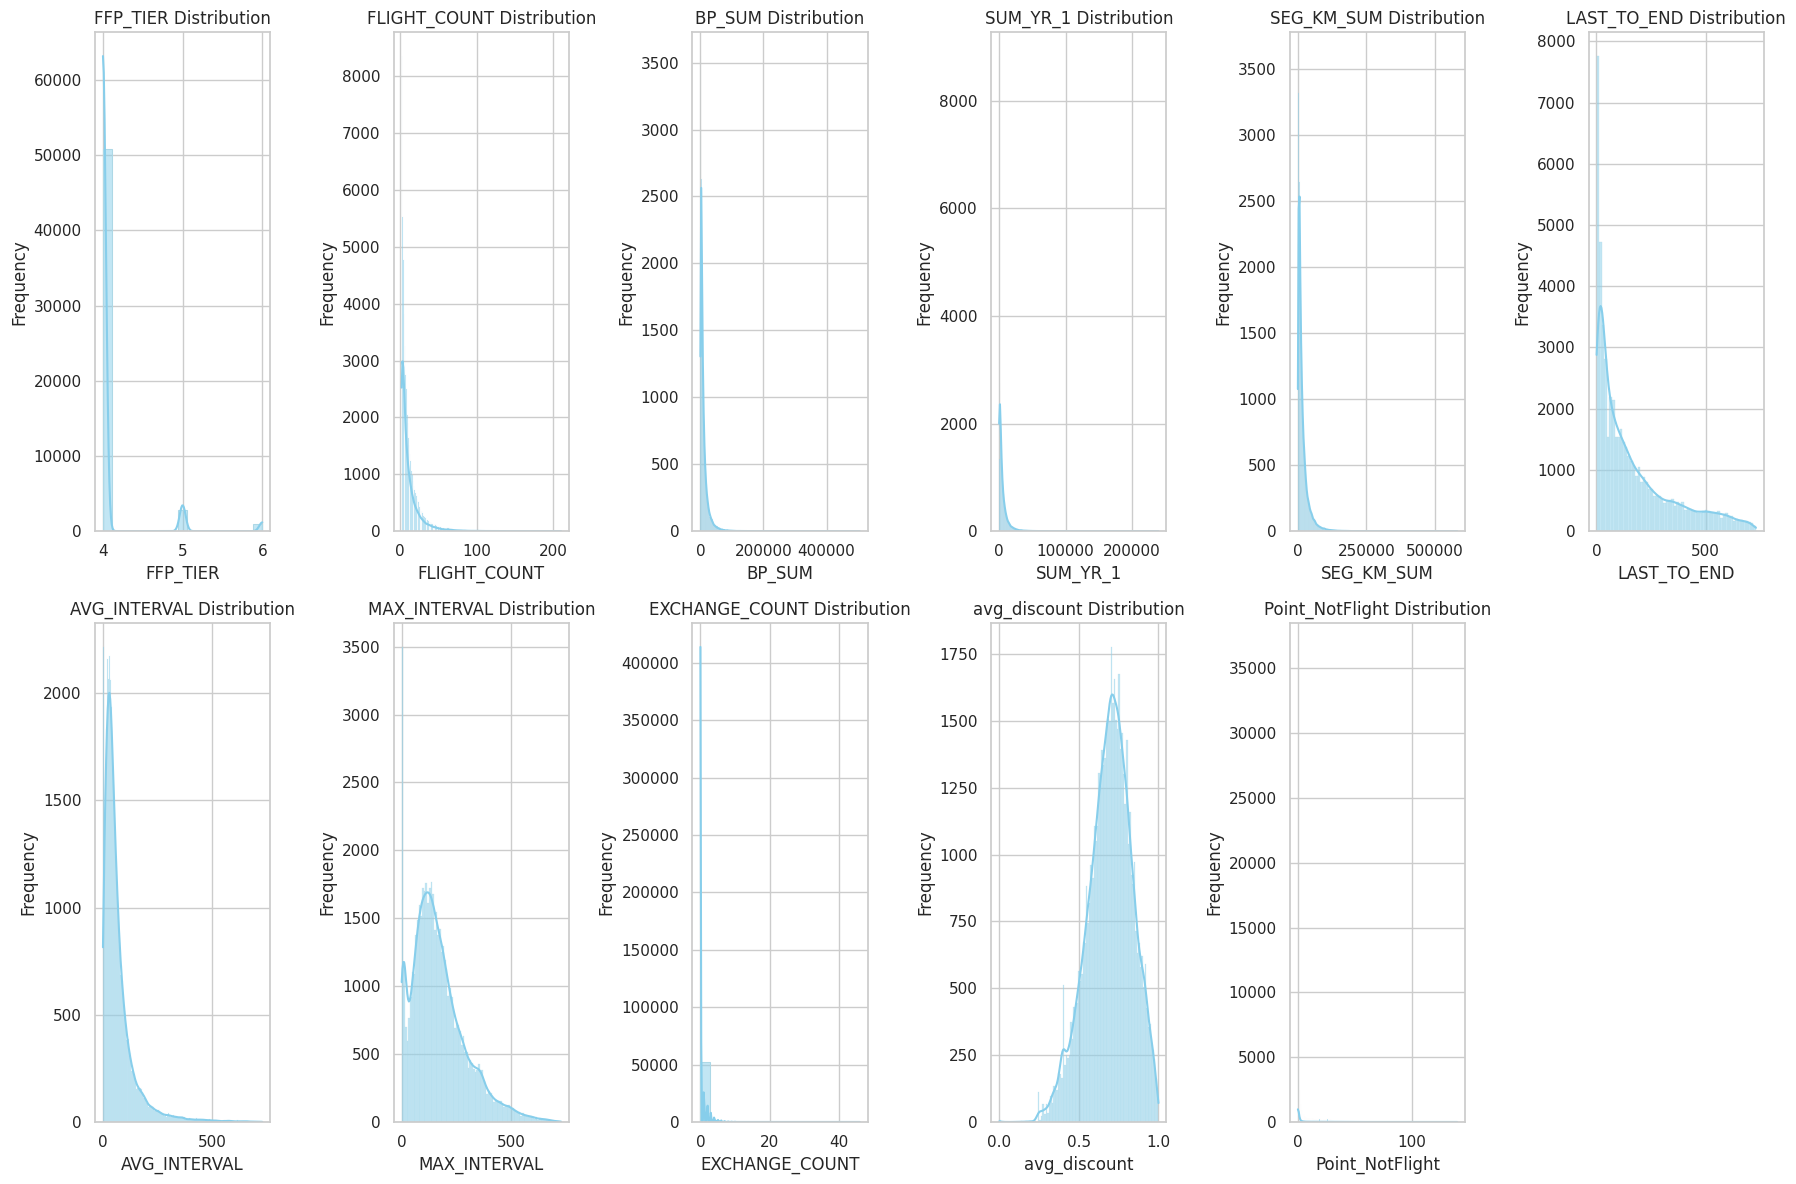

In [ ]:
fig, axes = plt.subplots(2, 6, figsize=(18, 12))
axes = axes.flatten()

# Loop through each numerical column
for i, column in enumerate(nums):
        # For other numerical columns, use distplot or histplot
        sns.histplot(data=data, x=column, kde=True, color='skyblue', edgecolor='lightblue', ax=axes[i])
        axes[i].set_title(f'{column} Distribution')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')

# Remove empty subplots
for i in range(len(nums), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

Pada histogram untuk fitur numerikal di atas dapat dilihat bahwa hanya fitur ``avg_discount`` yang memiliki distribusi normal. Selain itu fitur-fitur lain memiliki distribusi positive skew.

### Numerical Features - Boxplot

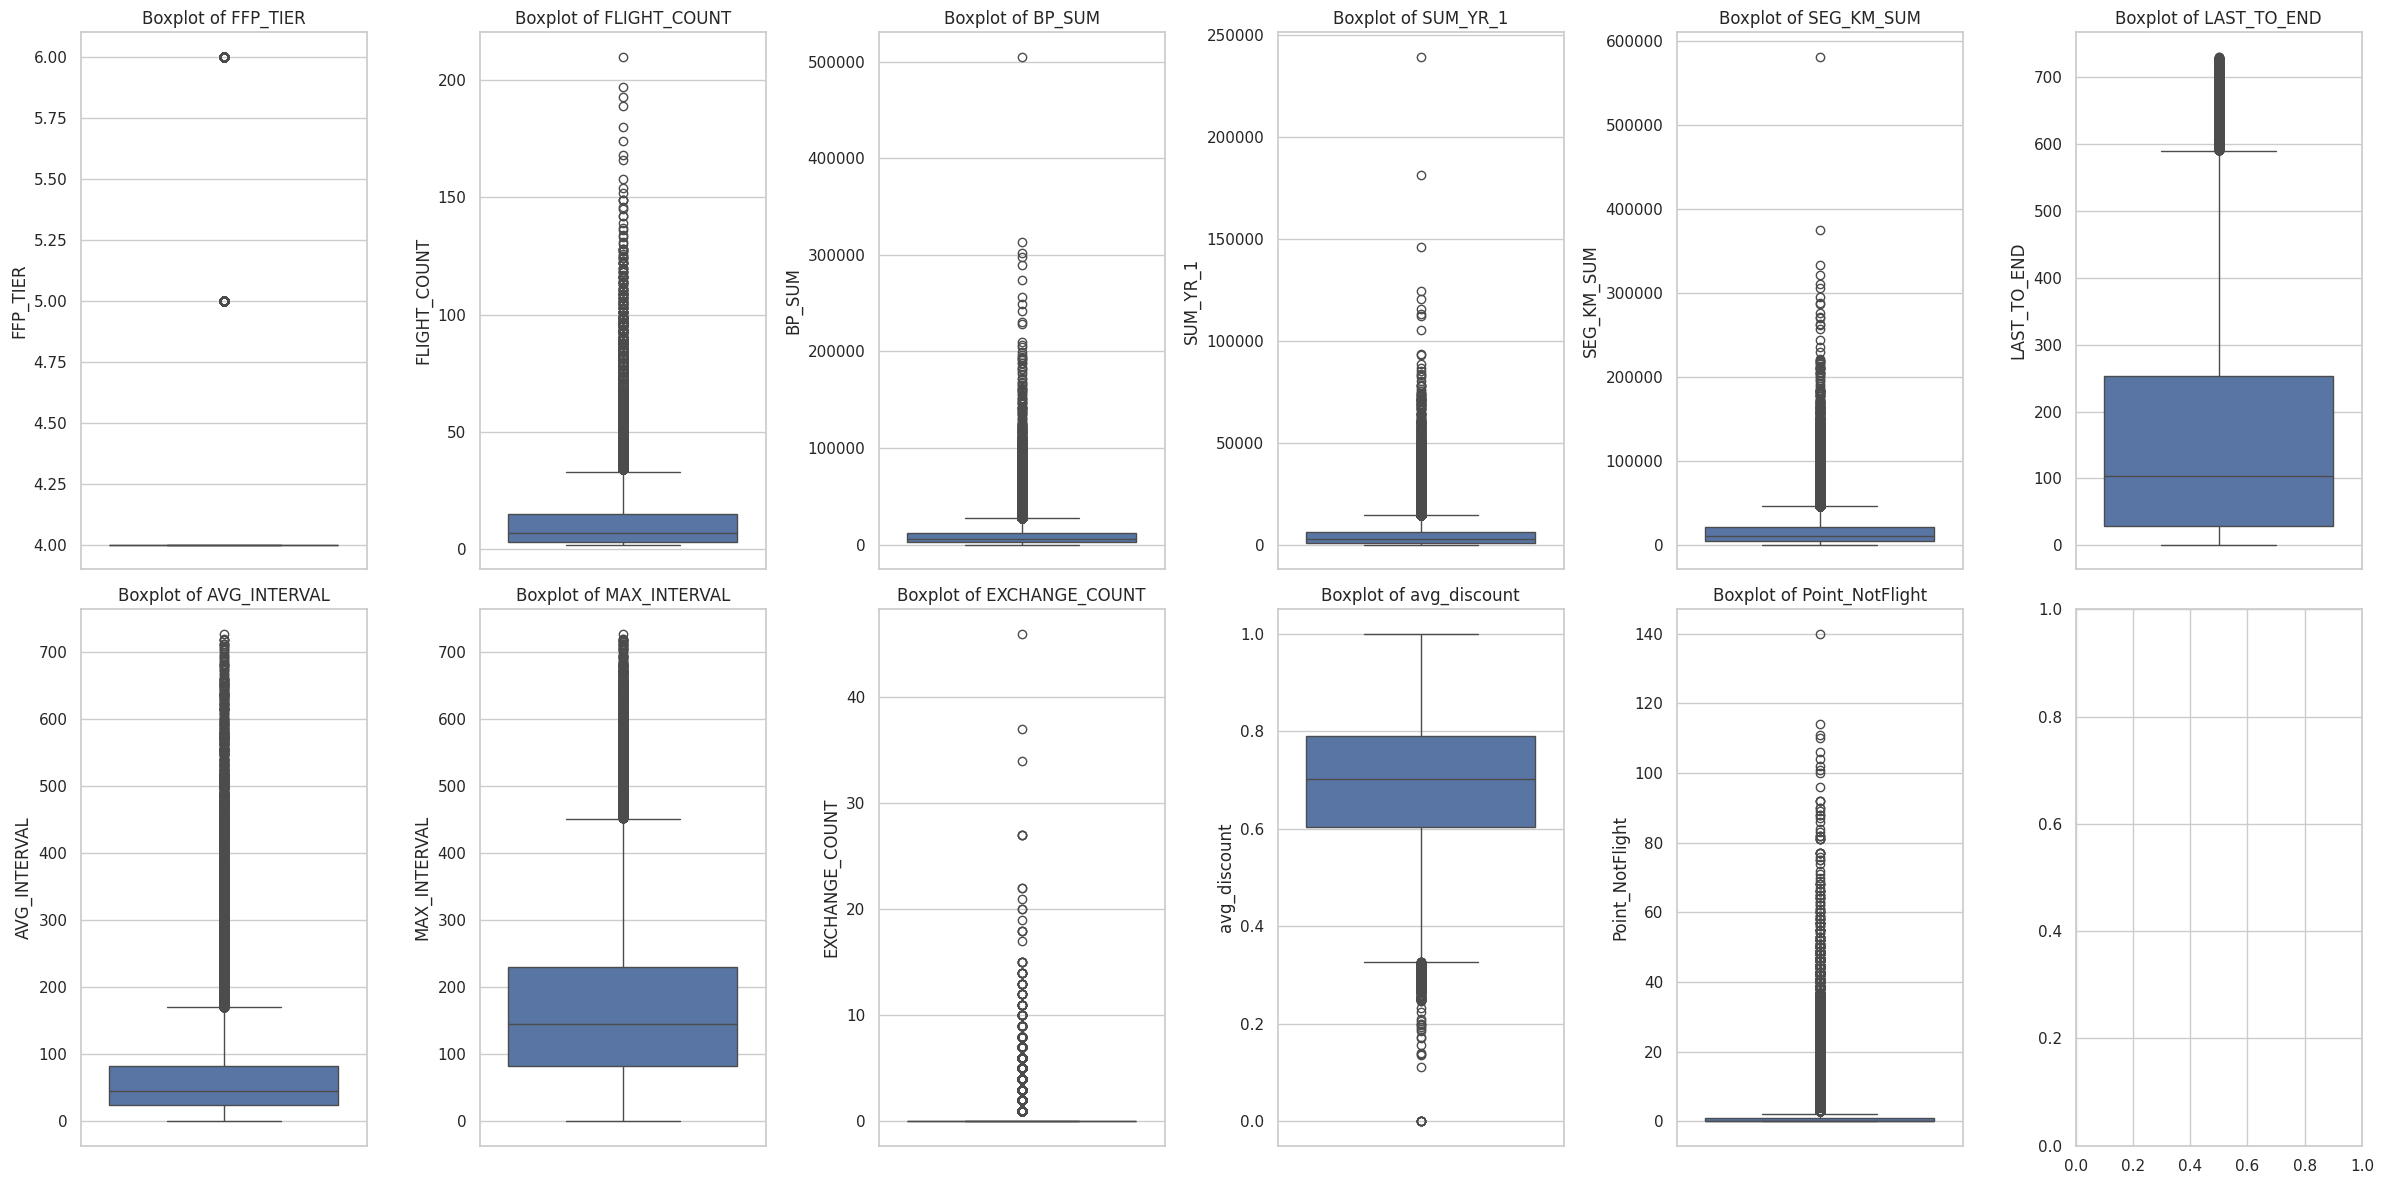

In [ ]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create a figure and axes
fig, axes = plt.subplots(2, 6, figsize=(24, 12))
axes = axes.flatten()

# Create boxplots for each column with sub-categories from 'gender'
for ax, column in zip(axes, nums):
    sns.boxplot(y=column, data=data, ax=ax)
    ax.set_title(f'Boxplot of {column}')

# Adjust the layout
plt.tight_layout()
plt.show()

Pada boxplot ini dapat dilihat kesamaan dengan observasi pada histogram. Semua fitur numerikal memiliki positive skew, dapat dilihat pada distribusi tinggi pada value rendah, kecuali pada fitur ``avg_discount``.

### Categorical Features - Barchart

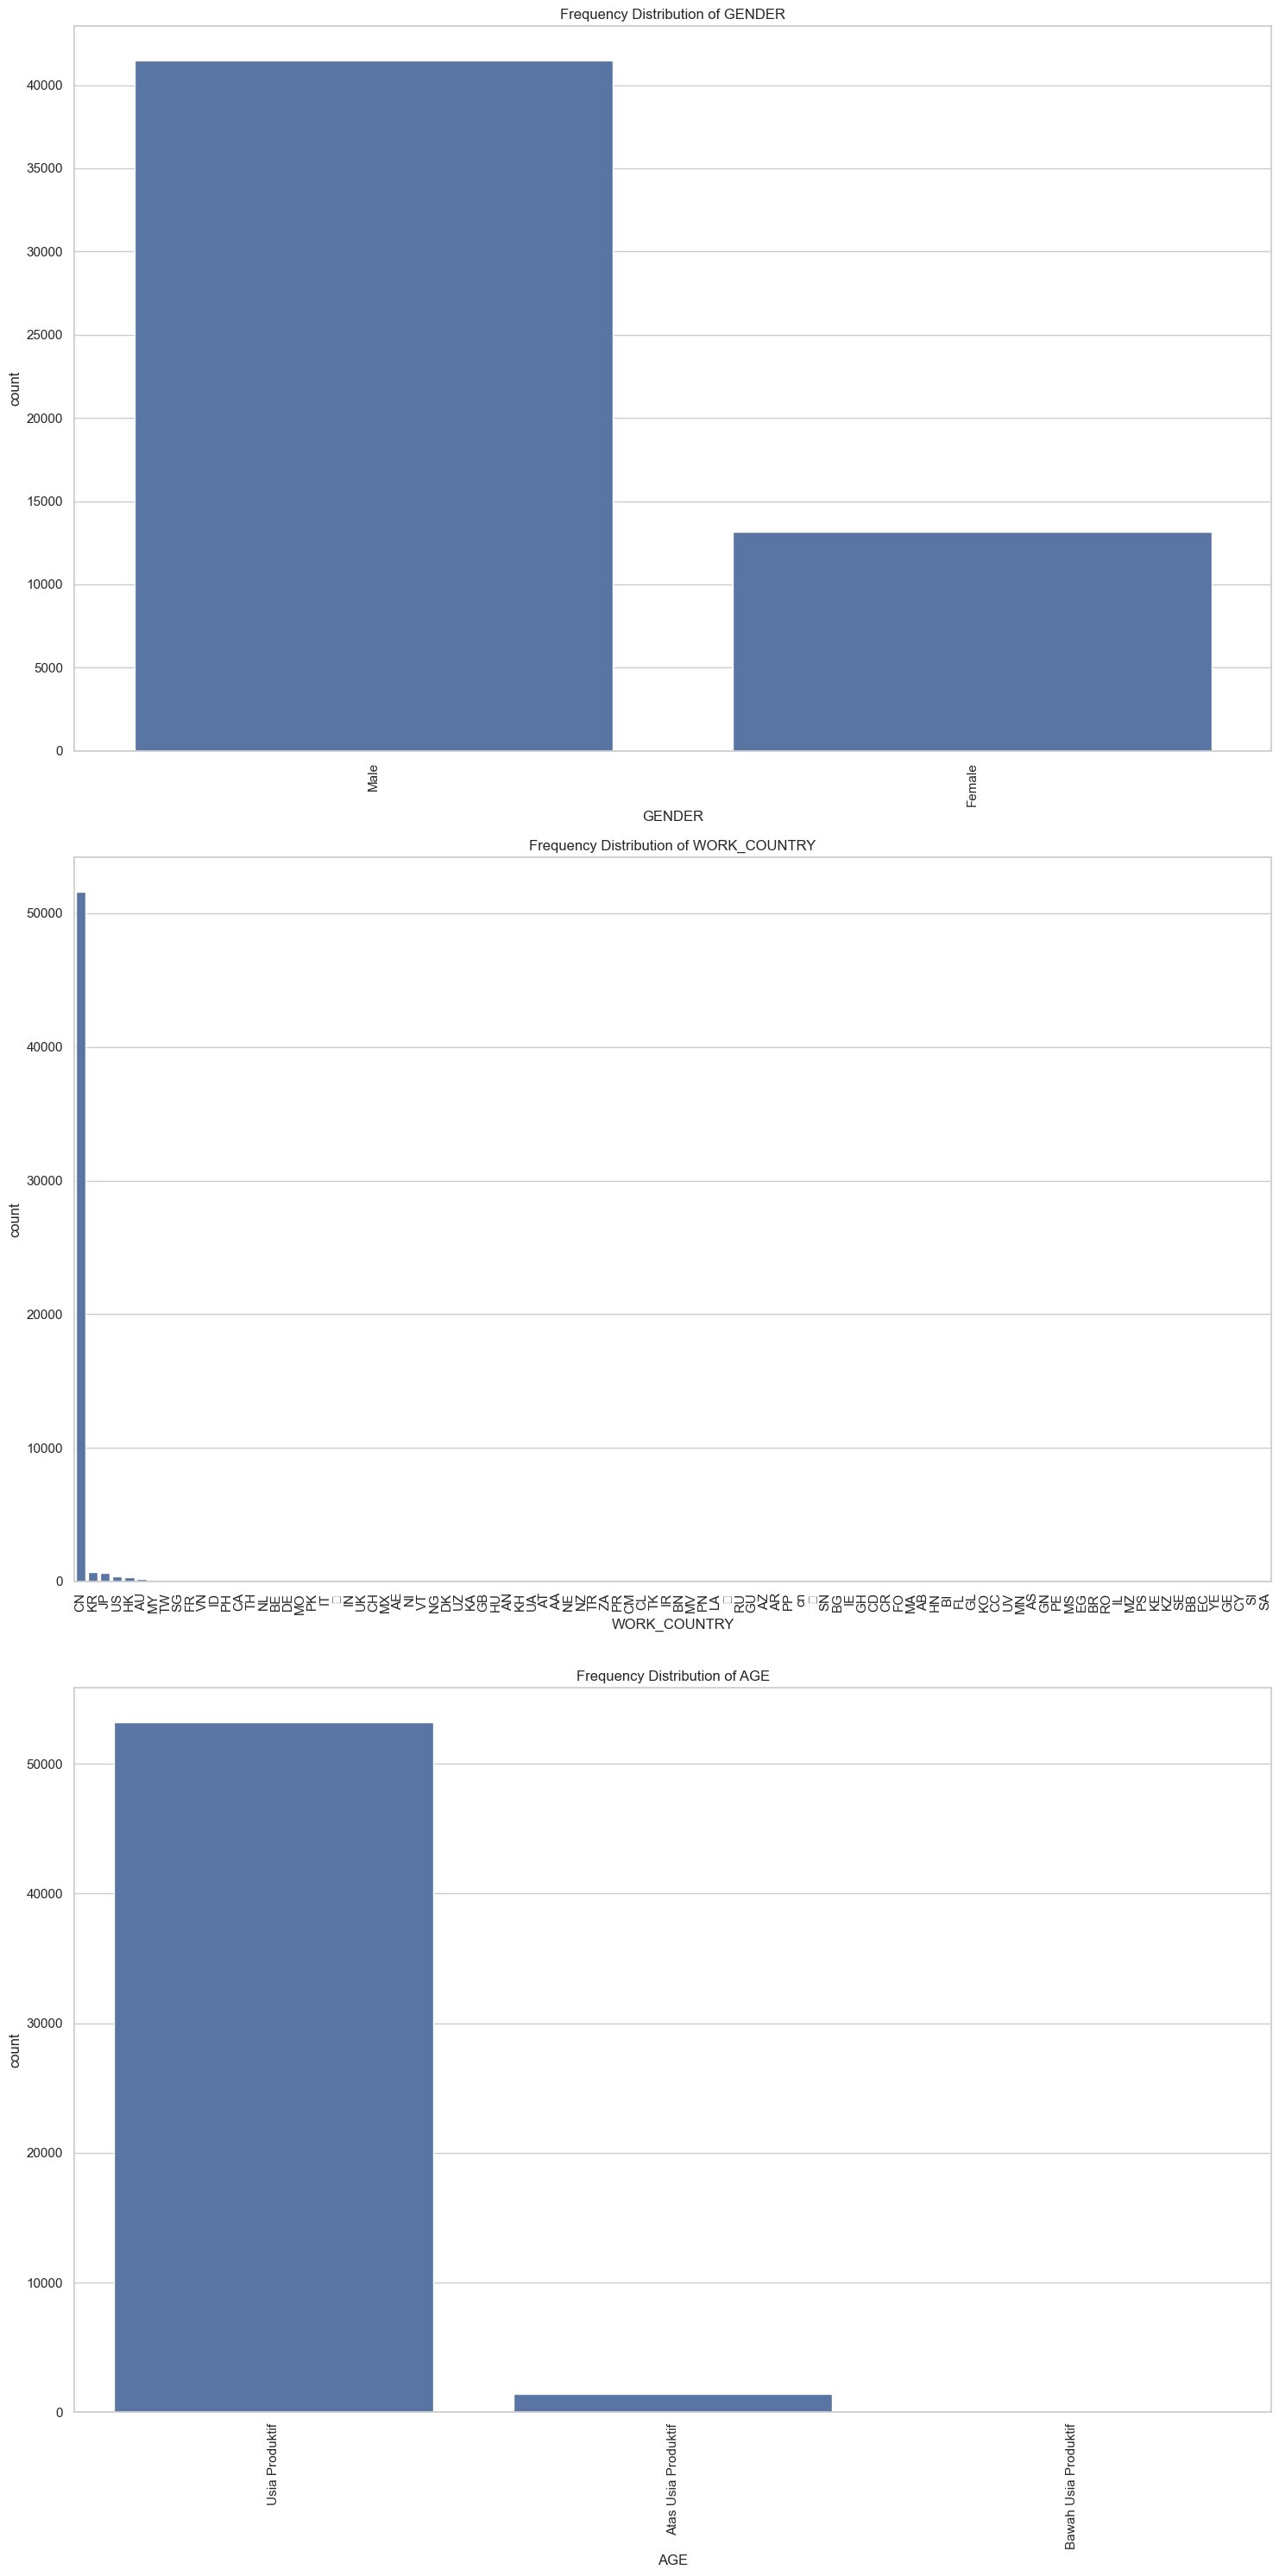

In [ ]:
# subplots
fig, axes = plt.subplots(3,1, figsize=(15,30))
fig.subplots_adjust(hspace=0.5)
axes = axes.flatten()

# Loop through each categorical columns
for i, (column, ax) in enumerate(zip(cats, axes)):
    order = data[column].value_counts().index
    sns.countplot(x=column, data=data, ax=ax, order=order)
    ax.set_title(f'Frequency Distribution of {column}')
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Remove empty subplots
for i in range(len(cats), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

1. Pada observasi untuk fitur kategorikal ``GENDER`` dapat dilihat bahwa lebih banyak pelanggan laki-laki dibanding pelanggan perempuan. Kita juga bisa melihat bahwa dataset ini hampir semuanya merupakan dataset penerbangan pelanggan dari Tiongkok.
2. Pada kolom AGE, frekuensi distribusi tertinggi customer yang melakukan penerbangan terdapat pada usia produktif (15-64 tahun).

## 2. Multivariate Analysis

### Numerical Features - Heatmap

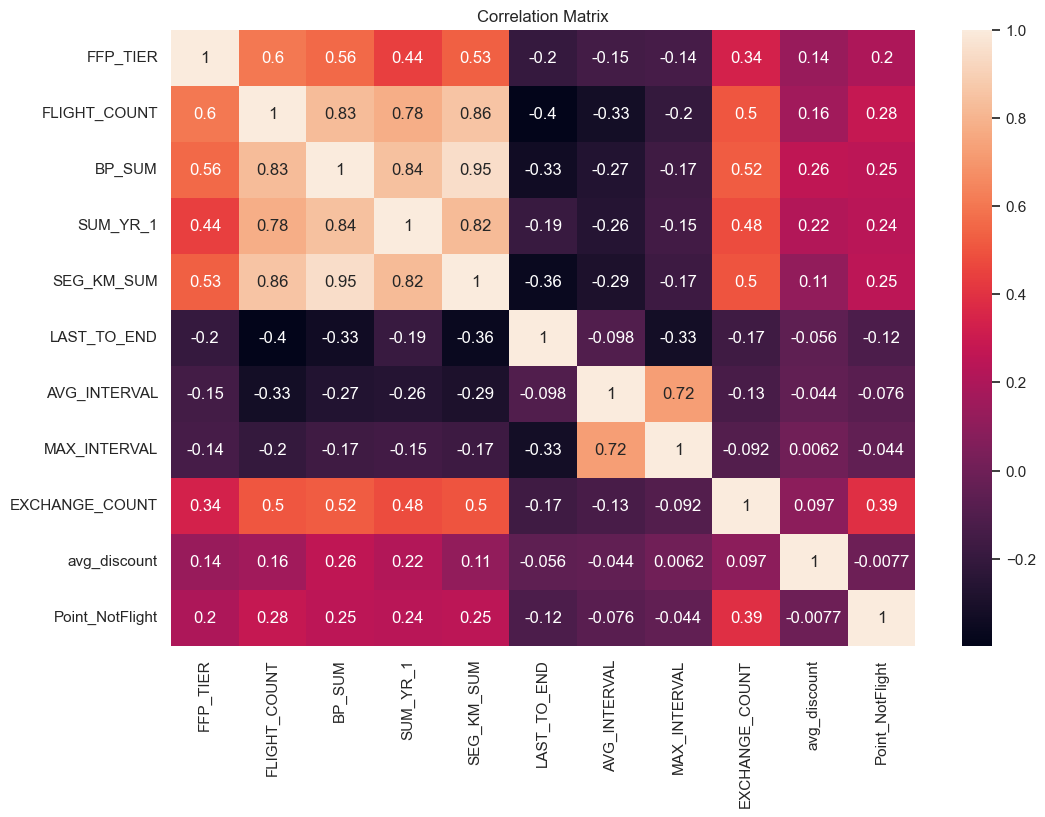

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(data[nums].corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

Ada beberapa fitur yang memiliki korelasi tinggi satu sama lain seperti ``flight_count``, ``bp_sum``, ``sum_yr_1``, dan ``seg_km_sum``. Kami memutuskan untuk tetap memasukkan kolom-kolom ini ke analisis dataset karena mereka merepresentasikan satuan-satuan penting pada dataset (jumlah penerbangan, harga tiket, dan jarak total penerbangan).

### Numerical Features - Pairplot

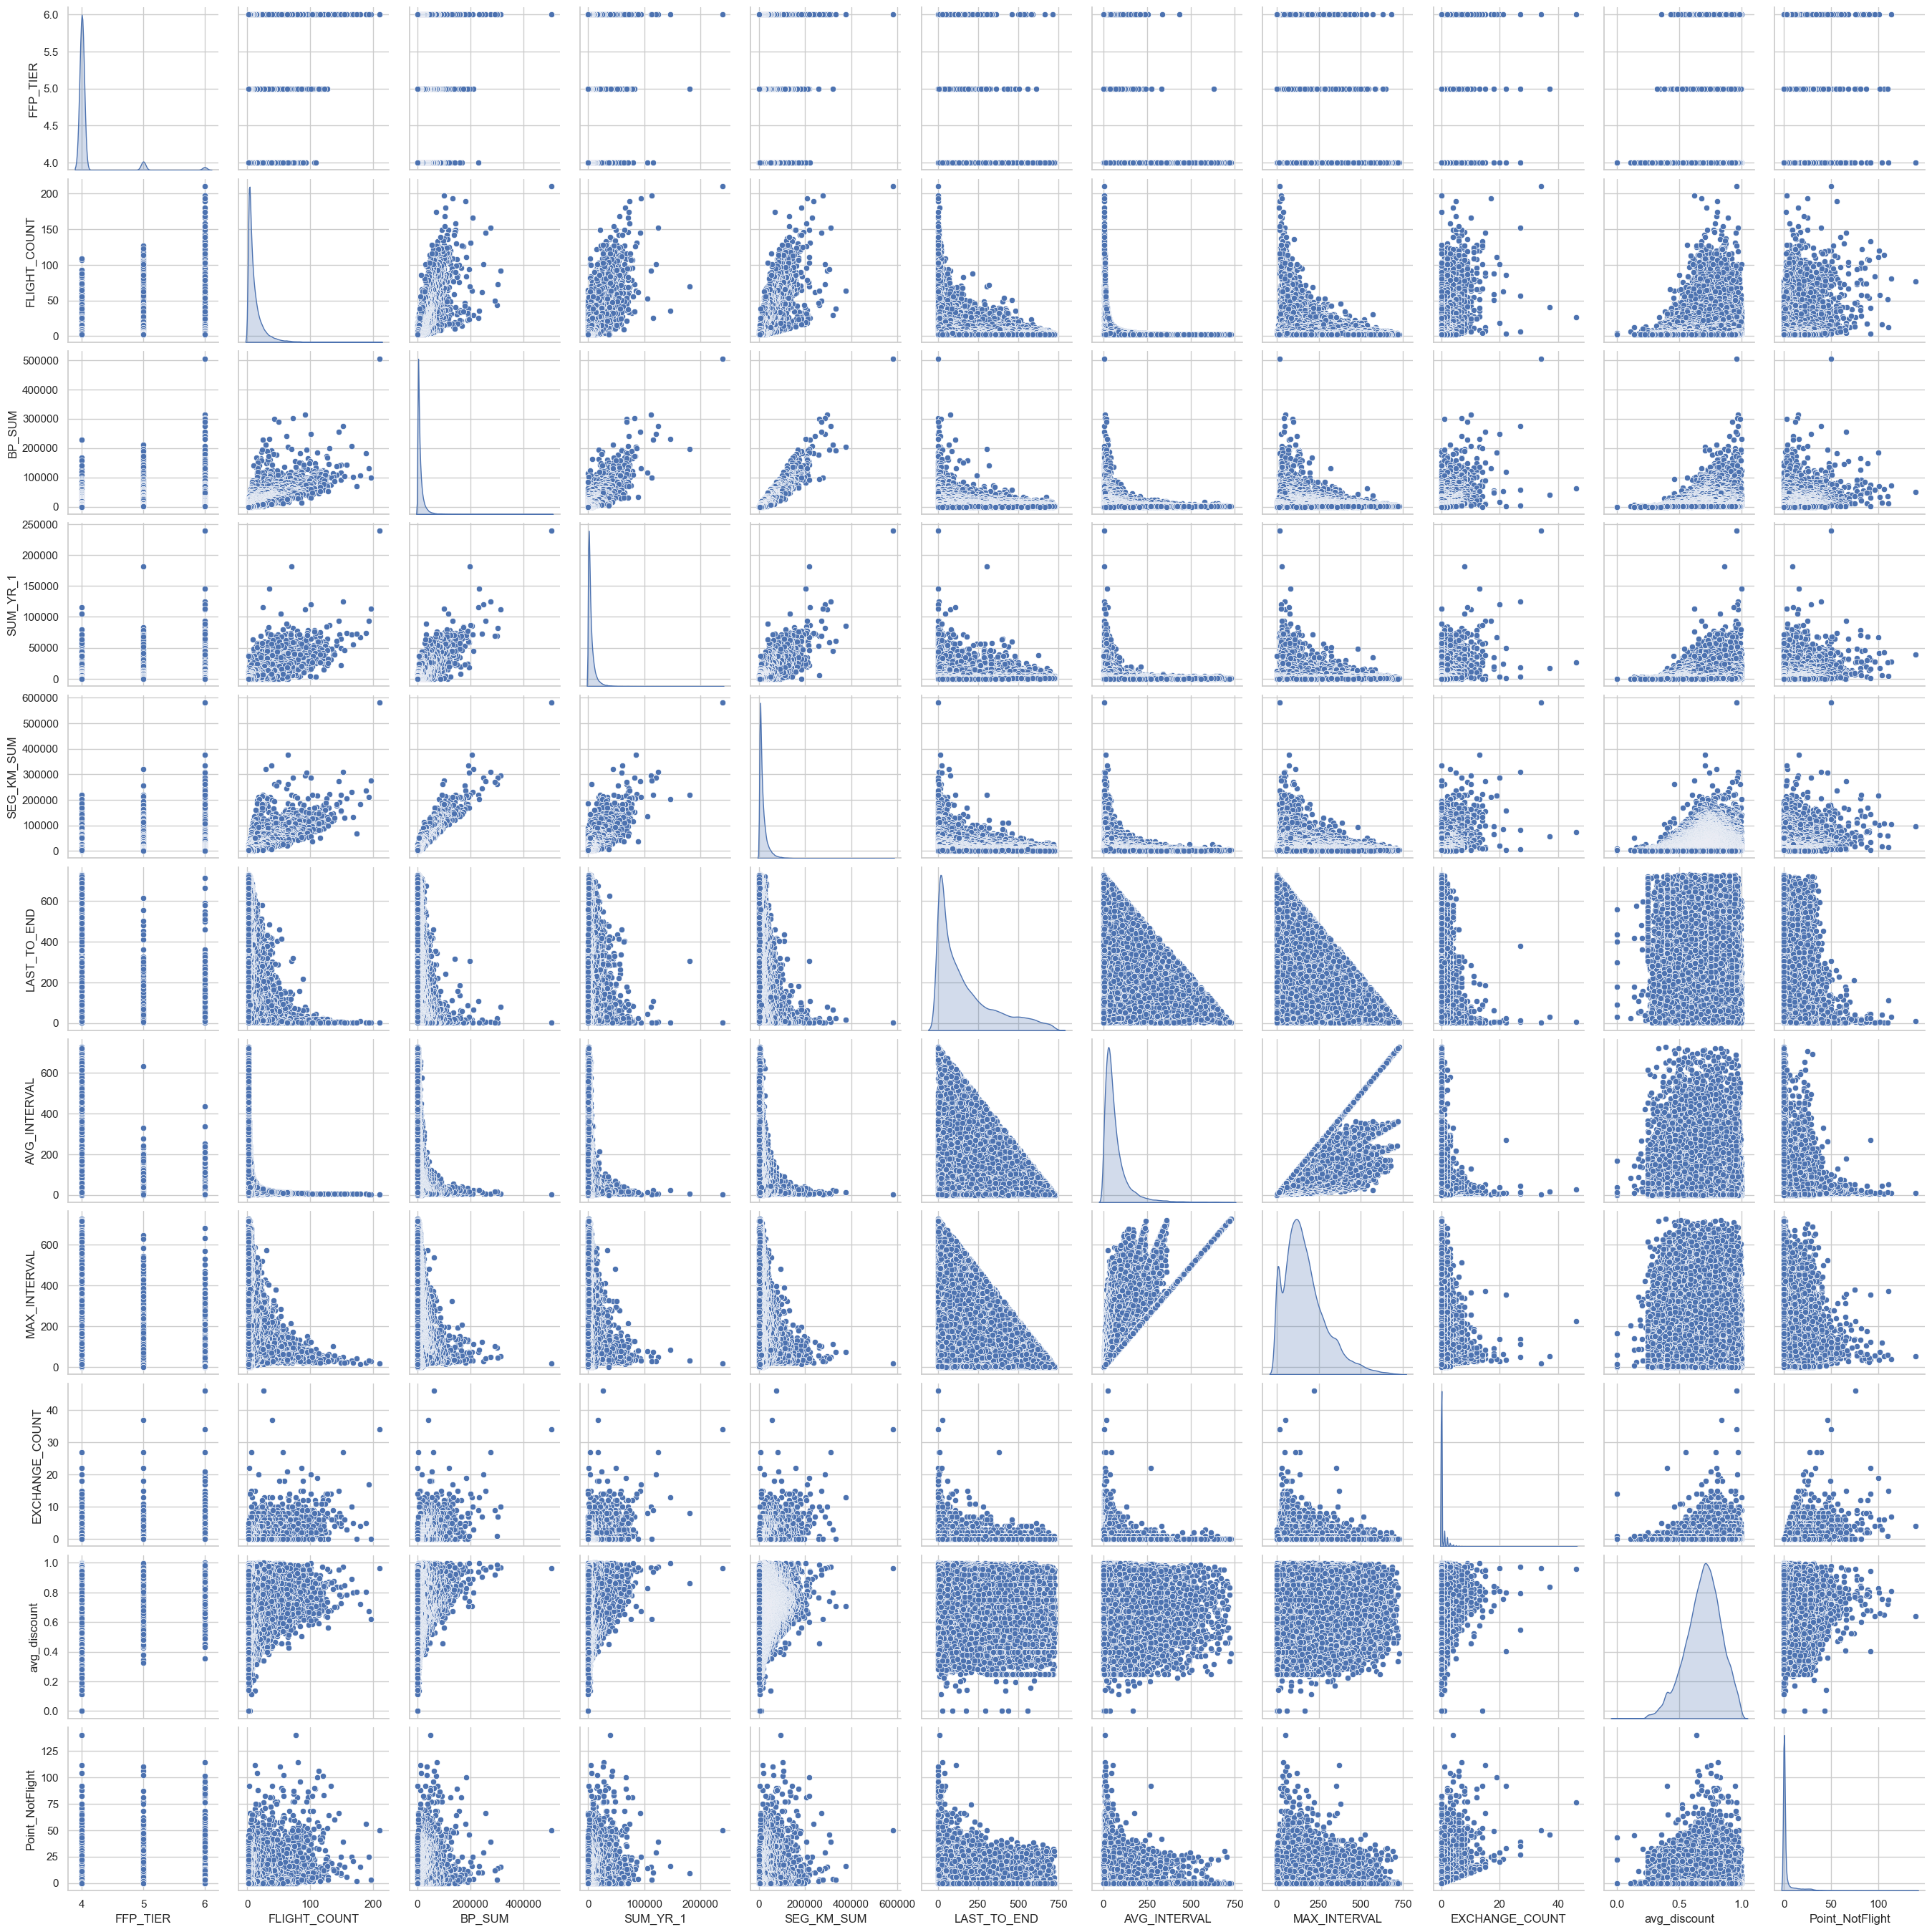

In [ ]:
sns.pairplot(data[nums], diag_kind='kde')

# **4. Data Pre-Processing - 2nd Section**

## **D. Feature Encoding**

### 1. Gender -> Male = 1, Female = 0

In [ ]:
# melihat nilai unik yang ada di kolom GENDER
data['GENDER'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
#Merubah kolom GENDER menjadi integer dan merubah nilai Female = 0 dan Male = 1
data['GENDER'] = data['GENDER'].replace({'Male': 1, 'Female':0}).astype(int)
data.GENDER.value_counts()

GENDER
1    41462
0    13139
Name: count, dtype: int64

### 2. Work_country -> hanya akan diambil dengan jumlah count di atas percentile 95% (5 negara + 1 kategori others) dan melakukan one-hot encoding

In [ ]:
# Menentukan country_work dengan jumlah count diatas percentile 95%
country_counts = data['WORK_COUNTRY'].value_counts()
threshold = country_counts.quantile(0.95)
top_channels = country_counts[country_counts >= threshold].index

# Mengganti country_work dengan jumlah count diatas percentile 95% dengan 'others'
data['WORK_COUNTRY'] = data['WORK_COUNTRY'].apply(lambda x: x if x in top_channels else 'others')

In [ ]:
# melihat nilai yang sudah diganti
data['WORK_COUNTRY'].unique()

array(['CN', 'others', 'US', 'JP', 'HK', 'KR'], dtype=object)

Melakukan One Hot Encoding pada kolom Work Country karena data bukan merupakan data ordinal

In [ ]:
# melakukan one hot encoding
data=pd.get_dummies(data,columns=['WORK_COUNTRY'])
data

FFP_DATE FIRST_FLIGHT_DATE  GENDER  FFP_TIER                  AGE  \
0     2006-11-02        2008-12-24       1         6       Usia Produktif   
4     2009-04-10        2009-04-15       1         6       Usia Produktif   
5     2008-02-10        2009-09-29       1         6  Atas Usia Produktif   
6     2006-03-22        2006-03-29       1         6       Usia Produktif   
7     2010-04-09        2010-04-09       0         6       Usia Produktif   
...          ...               ...     ...       ...                  ...   
62982 2013-01-20        2013-01-20       0         4       Usia Produktif   
62983 2011-05-20        2013-06-05       0         4       Usia Produktif   
62984 2010-03-08        2013-09-14       1         4       Usia Produktif   
62985 2006-03-30        2006-12-02       0         4       Usia Produktif   
62986 2013-02-06        2013-02-14       0         4       Usia Produktif   

       FLIGHT_COUNT  BP_SUM  SUM_YR_1  SEG_KM_SUM LAST_FLIGHT_DATE  ...  \
0               210  505308  239560.0      580717       2014-03-31  ...   
4               152  273844  124560.0      309928       2014-03-27  ...   
5                92  313338  112364.0      294585       2014-01-13  ...   
6               101  248864  120500.0      287042       2014-03-31  ...   
7                73  301864   82440.0      287230       2014-03-29  ...   
...             ...     ...       ...         ...              ...  ...   
62982             2       0       0.0        3848       2013-01-20  ...   
62983             2       0       0.0        1134       2013-06-09  ...   
62984             4       0       0.0        8016       2014-01-03  ...   
62985             2       0       0.0        2594       2014-03-03  ...   
62986             2       0       0.0        3934       2013-02-26  ...   

       First_to_last_flight  FFP_to_first_flight  Avg_distance  Avg_revenue  \
0                      1923                  783   2765.319048  1140.761905   
4                      1807                    5   2039.000000   819.473684   
5                      1567                  597   3202.010870  1221.347826   
6                      2924                    7   2842.000000  1193.069307   
7                      1450                    0   3934.657534  1129.315068   
...                     ...                  ...           ...          ...   
62982                     0                    0   1924.000000     0.000000   
62983                     4                  747    567.000000     0.000000   
62984                   111                 1286   2004.000000     0.000000   
62985                  2648                  247   1297.000000     0.000000   
62986                    12                    8   1967.000000     0.000000   

       WORK_COUNTRY_CN  WORK_COUNTRY_HK  WORK_COUNTRY_JP  WORK_COUNTRY_KR  \
0                 True            False            False            False   
4                 True            False            False            False   
5                 True            False            False            False   
6                 True            False            False            False   
7                 True            False            False            False   
...                ...              ...              ...              ...   
62982             True            False            False            False   
62983             True            False            False            False   
62984             True            False            False            False   
62985             True            False            False            False   
62986             True            False            False            False   

       WORK_COUNTRY_US  WORK_COUNTRY_others  
0                False                False  
4                False                False  
5                False                False  
6                False                False  
7                False                False  
...                ...          

### #3. Kolom Age diencode (tambahan)

Karena awalnya bertipe category, tadi dicoba modelling error. Jadi aku ubah jadi numerik pakai encoding

In [ ]:
# melakukan one hot encoding
data=pd.get_dummies(data,columns=['AGE'])
data

FFP_DATE FIRST_FLIGHT_DATE  GENDER  FFP_TIER  FLIGHT_COUNT  BP_SUM  \
0     2006-11-02        2008-12-24       1         6           210  505308   
4     2009-04-10        2009-04-15       1         6           152  273844   
5     2008-02-10        2009-09-29       1         6            92  313338   
6     2006-03-22        2006-03-29       1         6           101  248864   
7     2010-04-09        2010-04-09       0         6            73  301864   
...          ...               ...     ...       ...           ...     ...   
62982 2013-01-20        2013-01-20       0         4             2       0   
62983 2011-05-20        2013-06-05       0         4             2       0   
62984 2010-03-08        2013-09-14       1         4             4       0   
62985 2006-03-30        2006-12-02       0         4             2       0   
62986 2013-02-06        2013-02-14       0         4             2       0   

       SUM_YR_1  SEG_KM_SUM LAST_FLIGHT_DATE  LAST_TO_END  ...  Avg_revenue  \
0      239560.0      580717       2014-03-31            1  ...  1140.761905   
4      124560.0      309928       2014-03-27            5  ...   819.473684   
5      112364.0      294585       2014-01-13           79  ...  1221.347826   
6      120500.0      287042       2014-03-31            1  ...  1193.069307   
7       82440.0      287230       2014-03-29            3  ...  1129.315068   
...         ...         ...              ...          ...  ...          ...   
62982       0.0        3848       2013-01-20          437  ...     0.000000   
62983       0.0        1134       2013-06-09          297  ...     0.000000   
62984       0.0        8016       2014-01-03           89  ...     0.000000   
62985       0.0        2594       2014-03-03           29  ...     0.000000   
62986       0.0        3934       2013-02-26          400  ...     0.000000   

       WORK_COUNTRY_CN  WORK_COUNTRY_HK  WORK_COUNTRY_JP  WORK_COUNTRY_KR  \
0                 True            False            False            False   
4                 True            False            False            False   
5                 True            False            False            False   
6                 True            False            False            False   
7                 True            False            False            False   
...                ...              ...              ...              ...   
62982             True            False            False            False   
62983             True            False            False            False   
62984             True            False            False            False   
62985             True            False            False            False   
62986             True            False            False            False   

       WORK_COUNTRY_US  WORK_COUNTRY_others  AGE_Bawah Usia Produktif  \
0                False                False                     False   
4                False                False                     False   
5                False                False                     False   
6                False                False                     False   
7                False                False                     False   
...                ...                  ...                       ...   
62982            False                False                     False   
62983            False                False                     False   
62984            False                False                     False   
62985            False                False                     False   
62986            False                False                     False   

       AGE_Usia Produktif  AGE_Atas Usia Produktif  
0                    True                    False  
4                    True                    False  
5                   False                     True  
6                    True                    False  
7                    True                    False  
..

## **E. Handle Outliers**

Semua fitur numerikal akan dilakukan standardisasi sebelum dilakukan PCA  
Feature numerikal yang memiliki range:   
* BP_SUM, SUM_YR_1 (currency)  
* SEG_KM_SUM (km)  
* AVG_INTERVAL, 'MAX_INTERVAL', LAST_TO_END (waktu)  
* AVG_discount  

Feature numerikal yang diskrit:  
* Point_NotFlight  
* Points_Sum  
* Exchange_count   
* Flight_count  
* FFP_tier



In [ ]:
# fitur yang akan distandarisasi
feat_num = ['BP_SUM', 'SUM_YR_1', 'SEG_KM_SUM', 'AVG_INTERVAL', 'MAX_INTERVAL', 'LAST_TO_END', 'avg_discount', 'Point_NotFlight', 'EXCHANGE_COUNT', 'FLIGHT_COUNT', 'FFP_TIER']


In [ ]:
# Standarisasi fitur menggunakan fungsi StandardScaler()
scaler = StandardScaler()
data[feat_num] = scaler.fit_transform(data[feat_num])
data[feat_num]

BP_SUM   SUM_YR_1  SEG_KM_SUM  AVG_INTERVAL  MAX_INTERVAL  \
0      35.001220  32.980972   27.526816     -0.838097     -1.226223   
4      18.636217  16.810170   14.300738     -0.821240     -0.990259   
5      21.428527  15.095222   13.551343     -0.792095     -0.949576   
6      16.870077  16.239271   13.182922     -0.790208     -1.144856   
7      20.617291  10.887438   13.192105     -0.752469     -1.006532   
...          ...        ...         ...           ...           ...   
62982  -0.725144  -0.704918   -0.649051     -0.883099     -1.372683   
62983  -0.725144  -0.704918   -0.781610     -0.831421     -1.340136   
62984  -0.725144  -0.704918   -0.445474     -0.405081     -0.884482   
62985  -0.725144  -0.704918   -0.710300      1.261523     -0.021995   
62986  -0.725144  -0.704918   -0.644850     -0.728066     -1.275043   

       LAST_TO_END  avg_discount  Point_NotFlight  EXCHANGE_COUNT  \
0        -0.946530      1.921301         6.239030       31.033961   
4        -0.924043      1.985598         4.783782       24.585685   
5        -0.508030      1.964457         1.608695        8.925587   
6        -0.946530      1.947732         3.460829       18.137409   
7        -0.935287      1.924375         1.476400        6.162040   
...            ...           ...              ...             ...   
62982     1.504577     -4.934347        -0.375733       -0.286236   
62983     0.717524     -4.934347         2.534762        0.634946   
62984    -0.451811     -4.934347         5.312963       12.610316   
62985    -0.789120     -4.934347        -0.375733       -0.286236   
62986     1.296570     -4.934347        -0.375733       -0.286236   

       FLIGHT_COUNT  FFP_TIER  
0         14.171663  5.718448  
4         10.021419  5.718448  
5          5.728064  5.718448  
6          6.372067  5.718448  
7          4.368502  5.718448  
...             ...       ...  
62982     -0.711968 -0.254102  
62983     -0.711968 -0.254102  
62984     -0.568857 -0.254102  
62985     -0.711968 -0.254102  
62986     -0.711968 -0.254102  

[54601 rows x 11 columns]

# **5. Modelling**

Date time data sudah tidak perlu lagi, karena sudah digantikan fitur baru. Jika masih ada akan membuat model error.

In [ ]:
data = data.drop(['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LAST_FLIGHT_DATE'], axis=1)

In [ ]:
data

GENDER  FFP_TIER  FLIGHT_COUNT     BP_SUM   SUM_YR_1  SEG_KM_SUM  \
0           1  5.718448     14.171663  35.001220  32.980972   27.526816   
4           1  5.718448     10.021419  18.636217  16.810170   14.300738   
5           1  5.718448      5.728064  21.428527  15.095222   13.551343   
6           1  5.718448      6.372067  16.870077  16.239271   13.182922   
7           0  5.718448      4.368502  20.617291  10.887438   13.192105   
...       ...       ...           ...        ...        ...         ...   
62982       0 -0.254102     -0.711968  -0.725144  -0.704918   -0.649051   
62983       0 -0.254102     -0.711968  -0.725144  -0.704918   -0.781610   
62984       1 -0.254102     -0.568857  -0.725144  -0.704918   -0.445474   
62985       0 -0.254102     -0.711968  -0.725144  -0.704918   -0.710300   
62986       0 -0.254102     -0.711968  -0.725144  -0.704918   -0.644850   

       LAST_TO_END  AVG_INTERVAL  MAX_INTERVAL  EXCHANGE_COUNT  ...  \
0        -0.946530     -0.838097     -1.226223       31.033961  ...   
4        -0.924043     -0.821240     -0.990259       24.585685  ...   
5        -0.508030     -0.792095     -0.949576        8.925587  ...   
6        -0.946530     -0.790208     -1.144856       18.137409  ...   
7        -0.935287     -0.752469     -1.006532        6.162040  ...   
...            ...           ...           ...             ...  ...   
62982     1.504577     -0.883099     -1.372683       -0.286236  ...   
62983     0.717524     -0.831421     -1.340136        0.634946  ...   
62984    -0.451811     -0.405081     -0.884482       12.610316  ...   
62985    -0.789120      1.261523     -0.021995       -0.286236  ...   
62986     1.296570     -0.728066     -1.275043       -0.286236  ...   

       Avg_revenue  WORK_COUNTRY_CN  WORK_COUNTRY_HK  WORK_COUNTRY_JP  \
0      1140.761905             True            False            False   
4       819.473684             True            False            False   
5      1221.347826             True            False            False   
6      1193.069307             True            False            False   
7      1129.315068             True            False            False   
...            ...              ...              ...              ...   
62982     0.000000             True            False            False   
62983     0.000000             True            False            False   
62984     0.000000             True            False            False   
62985     0.000000             True            False            False   
62986     0.000000             True            False            False   

       WORK_COUNTRY_KR  WORK_COUNTRY_US  WORK_COUNTRY_others  \
0                False            False                False   
4                False            False                False   
5                False            False                False   
6                False            False                False   
7                False            False                False   
...                ...              ...                  ...   
62982            False            False                False   
62983            False            False                False   
62984            False            False                False   
62985            False            False                False   
62986            False            False                False   

       AGE_Bawah Usia Produktif  AGE_Usia Produktif  AGE_Atas Usia Produktif  
0                         False                True                    False  
4                         False                True                    False  
5                         False               False                     True  
6                         False                True                    False  
7                         False                True                    False  
...                         ...                 ...                      ...  
62982                     False                True   

## **Menentukan Jumlah Cluster yang optimal dengan metode elbow**

In [ ]:
# Menentukan jumlah cluster optimal dengan metode elbow
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
    inertia.append(kmeans.inertia_)

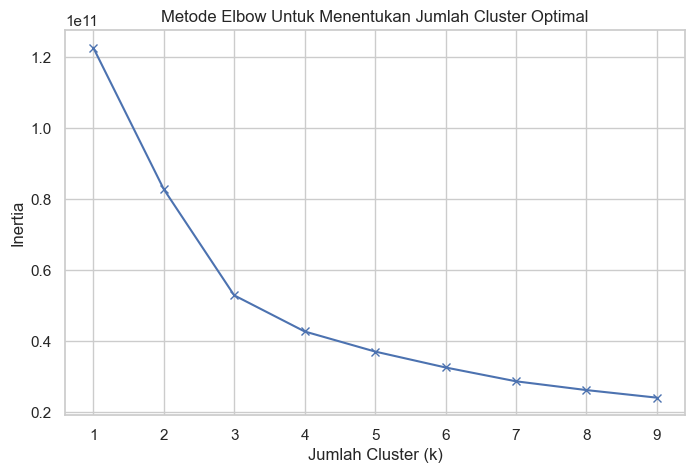

In [ ]:
# Visualisasi inertia vs jumlah cluster
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Metode Elbow Untuk Menentukan Jumlah Cluster Optimal')
plt.show()

In [ ]:
# Create cluster
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(data.values)

KMeans(n_clusters=3, random_state=0)

In [ ]:
clusters = kmeans.labels_
data['clusters'] = clusters
data.sample(5)

GENDER  FFP_TIER  FLIGHT_COUNT    BP_SUM  SUM_YR_1  SEG_KM_SUM  \
43896       1 -0.254102     -0.568857 -0.485676 -0.628985   -0.550926   
45604       1 -0.254102     -0.640412 -0.585719 -0.284899   -0.565188   
10610       1 -0.254102      0.289815  0.164289  0.011097    0.891254   
17827       0 -0.254102      0.576038  0.227285  0.239738    0.192803   
43548       1 -0.254102     -0.640412 -0.447991 -0.563177   -0.571586   

       LAST_TO_END  AVG_INTERVAL  MAX_INTERVAL  EXCHANGE_COUNT  ...  \
43896    -0.294401      0.327019      0.075645       -0.286236  ...   
45604     2.763861     -0.579493     -0.998396       -0.286236  ...   
10610    -0.822851     -0.322396     -0.021995        1.556128  ...   
17827    -0.890312     -0.396241      0.181421        1.556128  ...   
43548     0.048529      2.547004      2.939752       -0.286236  ...   

       WORK_COUNTRY_CN  WORK_COUNTRY_HK  WORK_COUNTRY_JP  WORK_COUNTRY_KR  \
43896             True            False            False            False   
45604             True            False            False            False   
10610             True            False            False            False   
17827             True            False            False            False   
43548             True            False            False            False   

       WORK_COUNTRY_US  WORK_COUNTRY_others  AGE_Bawah Usia Produktif  \
43896            False                False                     False   
45604            False                False                     False   
10610            False                False                     False   
17827            False                False                     False   
43548            False                False                     False   

       AGE_Usia Produktif  AGE_Atas Usia Produktif  clusters  
43896                True                    False         0  
45604                True                    False         0  
10610                True                    False         2  
17827                True                    False         2  
43548                True                    False         2  

[5 rows x 26 columns]

## **Evaluasi Model Menggunakan Silhouette Score**

In [ ]:
X = data.drop(['clusters'], axis=1)
y = data['clusters']

In [ ]:
from sklearn.metrics import silhouette_score

# 2. Silhouette Score
silhouette_avg = silhouette_score(X, y)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.38651391745876007


## **Dimensionality Reduction**

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(data)
pcs = pca.transform(data)

df_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
df_pca.head()

PC 1         PC 2
0  1226.974609   852.307758
1   459.974616   755.520063
2  1699.843881   561.566268
3  1211.138980  1934.910845
4  2404.898673   581.380431

In [ ]:
df_pca['clusters'] = clusters
df_pca.head(10)

PC 1         PC 2  clusters
0  1226.974609   852.307758         2
1   459.974616   755.520063         2
2  1699.843881   561.566268         2
3  1211.138980  1934.910845         2
4  2404.898673   581.380431         2
5  4336.405830   665.348322         1
6  4627.195232   542.454841         1
7   117.860829  2316.064268         2
8  9412.628272  2020.508640         1
9  3879.871361   786.743456         1

## **Visualisasi Cluster**

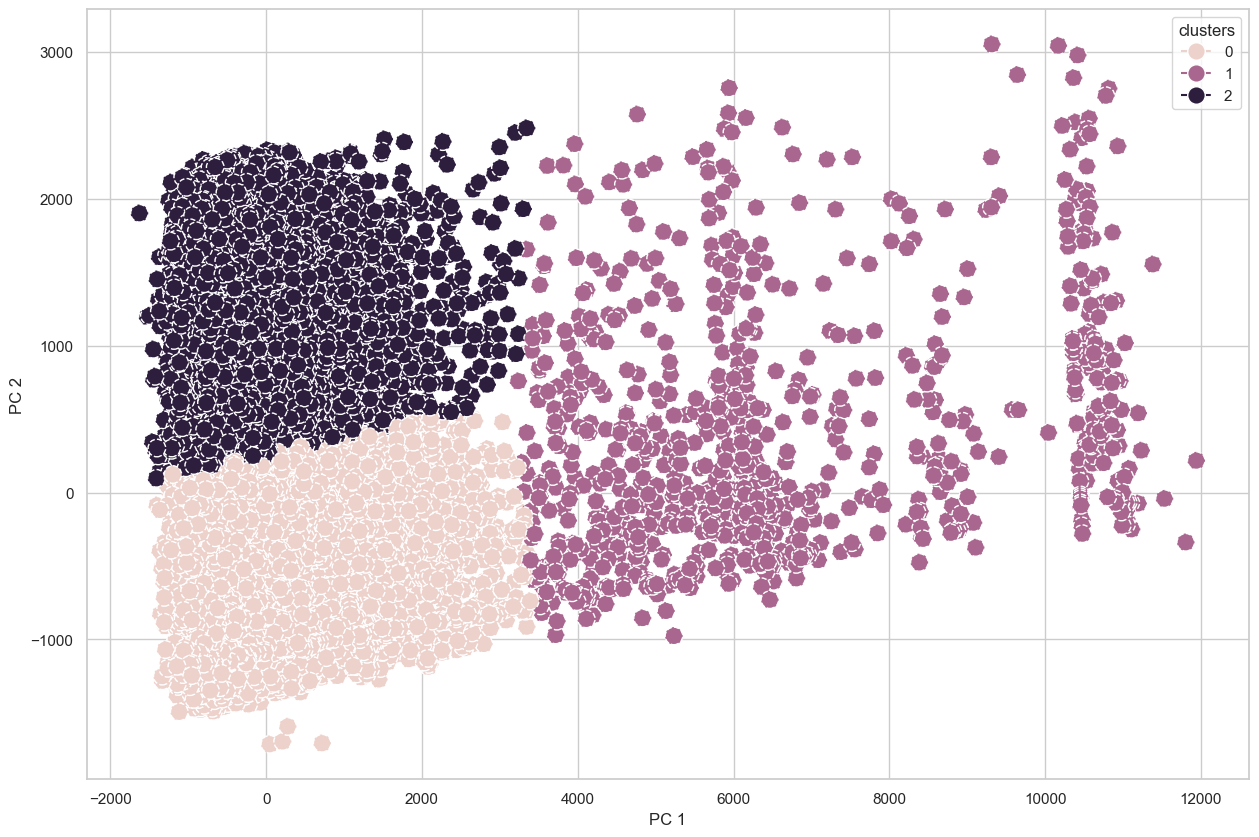

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x='PC 1', y='PC 2',
    hue='clusters',
    linestyle='--',
    data=df_pca,
    s=160,
    ax=ax
)

plt.show()

# **6. Interpretasi Cluster**

In [ ]:
data_2['clusters'] = kmeans.labels_

In [ ]:
data_3 = data_2[['Avg_distance', 'Avg_revenue', 'FLIGHT_COUNT', 'SEG_KM_SUM', 'SUM_YR_1', 'AVG_INTERVAL', 'MAX_INTERVAL', 'clusters']]

In [ ]:
display(data_3.groupby('clusters').agg(['mean','median']))

Avg_distance               Avg_revenue              FLIGHT_COUNT  \
                 mean       median         mean       median         mean   
clusters                                                                    
0         1473.578256  1355.333333   443.238201   375.555556     9.710104   
1         8169.567224  7598.200000  1504.049071  1404.000000     5.790194   
2         1440.305175  1346.666667   408.671523   376.266667    16.580132   

                   SEG_KM_SUM              SUM_YR_1         AVG_INTERVAL  \
         median          mean   median         mean  median         mean   
clusters                                                                   
0           6.0  13587.519295   8338.0  3975.067132  2257.0    70.497437   
1           4.0  44416.030787  27304.0  8340.254276  5660.0    88.695305   
2          11.0  22698.808426  14550.0  6862.794383  4028.0    63.231736   

                    MAX_INTERVAL         
             median         mean median  
clusters                                 
0         46.666667   164.402987  142.0  
1         60.428571   169.470924  150.0  
2         42.500000   176.989946  151.0

Deskripsi masing-masing cluster
- Cluster 0 merupakan pelanggan yang telah melakukan penerbangan dengan frekuensi yang sedang, yaitu sebanyak 10 kali penerbangan, dan penghasilan yang di dapat berdasarkan customer cluster tersebut termasuk rendah, yaitu dengan rata-rata 3.975 Yuan. Total rata-rata jarak yang ditempuh oleh pelanggan tipe cluster ini adalah sejauh 14.000 km.
- Cluster 1 merupakan pelanggan yang telah melakukan penerbangan dengan frekuensi yang rendah, yaitu sebanyak 6 kali penerbangan, dan penghasilan yang di dapat berdasarkan customer cluster tersebut termasuk tinggi, yaitu dengan rata-rata 8340 Yuan. Total jarak yang ditempuh oleh pelanggan tipe cluster ini adalah sejauh 44.416 km yang mana tergolong sangat jauh jika dibandingkan cluster sebelumnya.
- Cluster 2 merupakan pelanggan yang telah melakukan penerbangan dengan frekuensi yang tinggi, yaitu sebanyak 17 kali penerbangan, dan penghasilan yang di dapat berdasarkan customer cluster tersebut termasuk sedang, yaitu dengan rata-rata 6862 Yuan. Total rata-rata jarak yang ditempuh oleh pelanggan tipe cluster ini adalah sejauh 22.698 km yang mana tergolong sedang jika dibandingkan dengan cluster 1.

## Kesimpulan

- Pengelompokkan cluster cenderung lebih berbobot ke arah total jarak yang ditempuh oleh penumpang tersebut dan seberapa banyak pendapatan yang dihasilkan oleh customer tersebut
- Pelanggan Cluster 0 memiliki total pendapatan dan jarak tempuh terendah diantara cluster lainnya. Kemungkinan pelanggan jenis ini merupakan pekerja lokal yang memakai jasa pesawat untuk perjalanan bisnis/pribadi domestik.
- Cluster 1 memiliki total pendapatan dan jarak tempuh tertinggi diantara cluster lainnya. Kemungkinan pelanggan jenis ini merupakan pekerja perusahaan multinasional yang memakai jasa pesawat untuk perjalanan bisnis/pribadi luar negeri.
- Sedangkan Cluster 2 memiliki total pendapatan dan jarak tempuh ditengah-tengah antara cluster 0 dan 1. Kemungkinan pelanggan jenis ini merupakan pekerja regional yang memakai jasa pesawat untuk perjalanan bisnis/pribadi domestik atau regional.

Pengelompokkan pelanggan ini harus dibuktikan secara berkala dengan survei langsung ke pelanggan cluster tersebut, sebelum business action dilakukan.

## Rekomendasi Bisnis

Setelah survei sudah dilakukan dan hasilnya sesuai dengan persona yang tersimpulkan dari hasil analisis ini, maka perusahaan airline ini dapat melakukan:
1. Memberikan apresiasi yang sesuai dengan jenis cluster seperti diskon
ataupun promo khusus untuk agar mereka tetap berlangganan.
     - Pada cluster 0 yang pelanggannya sering memakai jasa namun dengan jarak sedikit, diskon bisa hanya muncul ketika mereka sudah 3x terbang dengan value yang kecil atau sedang.
     - Pada cluster 1 yang pelanggannya jarang memakai jasa namun dengan jarak tinggi, diskon bisa muncul setiap mereka terbang dengan value yang sedang atau tinggi.
     - Pada cluster 2 yang total pendapatan dan jarak tempuh di tengah-tengah cluster 0 dan 1, diskon bisa muncul dengan frekuensi penerbangan dan diskon di tengah-tengah cluster 0 dan 1.
2. Selain diskon, perusahaan juga bisa melakukan segmentasi di bagian operasi seperti tempat boarding, jenis pesawat, dan fasilitas lounge atau ruang tunggu yang berbeda, menyesuaikan pada karakteristik tiap-tiap cluster.
3. Perusahaan dapat menarik pelanggan baru dan mempertahankan pelanggan lama
dengan cara meningkatkan kualitas pelayanan dan memberikan inovasi berkelanjutan
sesuai dengan segmentasi mereka.